<a href="https://colab.research.google.com/github/Teshtrinpavithra/CODSOFT/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

try:
    data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
    print("File uploaded and loaded successfully!")
except KeyError:
    print("Error: 'train.csv' not found in uploaded files. Please upload the file using the file upload widget.")
except Exception as e:
    print(f"An error occurred: {e}")

if data is not None:
  data.head()

Saving train.csv to train (3).csv
Error: 'train.csv' not found in uploaded files. Please upload the file using the file upload widget.


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['train (3).csv']))

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print(data.columns)
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
print(data.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [ ]:
data["Fare"].fillna(data["Fare"].mean(), inplace=True)


<ipython-input-66-5bc3b2fffd76>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Fare"].fillna(data["Fare"].mean(), inplace=True)


In [ ]:
data["Fare"].isnull().sum()


np.int64(0)

In [ ]:
Age_data=data[["Survived","Pclass","Age","Fare"]]

In [ ]:
with_null=Age_data.loc[Age_data["Age"].isnull()]
without_null=Age_data.loc[Age_data["Age"].notna()]

In [ ]:
with_null.describe()

,Survived,Pclass,Age,Fare
count,177.000000,177.000000,0.0,177.000000
mean,0.293785,2.598870,NaN,22.158567
std,0.456787,0.763216,NaN,31.874608
min,0.000000,1.000000,NaN,0.000000
25%,0.000000,3.000000,NaN,7.750000
50%,0.000000,3.000000,NaN,8.050000
75%,1.000000,3.000000,NaN,24.150000
max,1.000000,3.000000,NaN,227.525000


In [ ]:
without_null.describe()

,Survived,Pclass,Age,Fare
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514
std,0.491460,0.838250,14.526497,52.918930
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.125000,8.050000
50%,0.000000,2.000000,28.000000,15.741700
75%,1.000000,3.000000,38.000000,33.375000
max,1.000000,3.000000,80.000000,512.329200


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

X = without_null.drop("Age", axis=1)
y = without_null["Age"]

Age_prediction = LinearRegression()
Age_prediction.fit(X, y)


LinearRegression()

In [ ]:
result_Age_prediction=Age_prediction.predict(with_null.drop("Age",axis=1))

In [ ]:
result_Age_prediction

array([26.4695118 , 28.60608629, 19.69770102, 26.51478941, 19.67368366,
       26.49016262, 32.82459482, 19.67842692, 19.69754683, 26.49016262,
       26.48450154, 26.21099289, 19.67842692, 25.98413857, 36.90045382,
       44.00313664, 19.40323683, 26.49016262, 26.48450154, 19.6770502 ,
       26.48450154, 26.48450154, 26.49016262, 19.67750911, 19.07634076,
       26.48450154, 26.49551531, 19.14211867, 26.22032522, 26.51157706,
       26.46201509, 24.22667843, 36.18455868, 44.06906507, 25.84508971,
       24.22667843, 35.34791391, 43.18520993, 19.3939045 , 26.49551531,
       19.67842692, 24.22667843, 26.49551531, 26.49016262, 25.84508971,
       26.50285783, 26.24938689, 19.3939045 , 26.5138716 , 35.29611446,
       26.49551531, 26.49551531, 43.88274878, 19.67842692, 35.90043811,
       44.06631163, 44.00313664, 37.08401667, 19.67842692, 19.10938207,
       28.62994947, 26.48450154, 34.13293906, 24.22667843, 19.10938207,
       33.29711497, 26.49016262, 19.37187695, 43.73589849, 26.51

In [ ]:
data.loc[data["Age"].isnull(),"Age"]=result_Age_prediction

In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
average_Age_of_survived=data["Age"].mean()
print(average_Age_of_survived)

29.286540260517498


In [ ]:
data["Sex_Encoded"] = data["Sex"].map({"male": 1, "female": 2})


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
data[["Sex","Sex_Encoded"]].head()

,Sex,Sex_Encoded
0,male,1
1,female,2
2,female,2
3,female,2
4,male,1


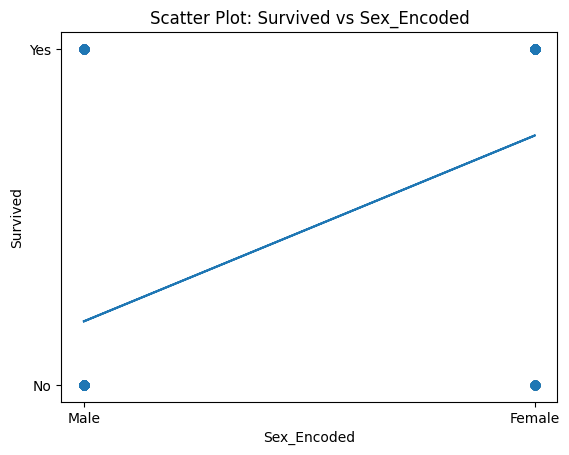

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(data["Sex_Encoded"], data["Survived"])

# Regression line
z = np.polyfit(data["Sex_Encoded"], data["Survived"], 1)
p = np.poly1d(z)
plt.plot(data["Sex_Encoded"], p(data["Sex_Encoded"]))

# Axis labels
plt.xlabel("Sex_Encoded")
plt.ylabel("Survived")

# Title and ticks
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1, 2], ['Male', 'Female'])

# Show plot
plt.show()
